In [0]:
!pip install face-alignment

In [0]:
!apt-get -qq install -y libsm6 libxext6 && pip install -q -U opencv-python

     |████████████████████████████████| 28.2MB 110kB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.


In [0]:
import face_alignment
import cv2
from skimage import io
import os
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
cap= cv2.VideoCapture('/content/drive/My Drive/Dataset/pe1.mp4')
i=0
while(cap.isOpened()):
    ret, frame = cap.read()
    if ret == False:
        break
    cv2.imwrite('kang'+str(i)+'.jpg',frame)
    i+=1

In [0]:
print(frame)

None


In [0]:
import tensorflow as tf

In [0]:
image_path = "/content/drive/My Drive/Dataset/peone"
def loadImages(path):
  image_files = sorted([os.path.join(path, file)
                        for file in os.listdir(path)
                        if file.endswith('.jpg')])
  return image_files

# Display one image
def display_one(a, title1 = "Original"):
  plt.imshow(a), plt.title(title1)
  plt.show()

In [0]:
dataset = loadImages(image_path)
print('number of FILES in dir', len(dataset))
print("--------------------------------")
dataset


number of FILES in dir 63
--------------------------------


['/content/drive/My Drive/Dataset/peone/peone0.jpg',
 '/content/drive/My Drive/Dataset/peone/peone1.jpg',
 '/content/drive/My Drive/Dataset/peone/peone10.jpg',
 '/content/drive/My Drive/Dataset/peone/peone11.jpg',
 '/content/drive/My Drive/Dataset/peone/peone12.jpg',
 '/content/drive/My Drive/Dataset/peone/peone13.jpg',
 '/content/drive/My Drive/Dataset/peone/peone14.jpg',
 '/content/drive/My Drive/Dataset/peone/peone15.jpg',
 '/content/drive/My Drive/Dataset/peone/peone16.jpg',
 '/content/drive/My Drive/Dataset/peone/peone17.jpg',
 '/content/drive/My Drive/Dataset/peone/peone18.jpg',
 '/content/drive/My Drive/Dataset/peone/peone19.jpg',
 '/content/drive/My Drive/Dataset/peone/peone2.jpg',
 '/content/drive/My Drive/Dataset/peone/peone20.jpg',
 '/content/drive/My Drive/Dataset/peone/peone21.jpg',
 '/content/drive/My Drive/Dataset/peone/peone22.jpg',
 '/content/drive/My Drive/Dataset/peone/peone23.jpg',
 '/content/drive/My Drive/Dataset/peone/peone24.jpg',
 '/content/drive/My Drive/Datas

In [0]:
koordinat = []
img = []
count = 0
for i in range(len(dataset)):
  input = cv2.imread(dataset[i], cv2.IMREAD_UNCHANGED)
  img.append(input)
  print(count)

  fa = face_alignment.FaceAlignment(face_alignment.LandmarksType._2D, flip_input=True)
  preds = fa.get_landmarks(input)[0]
  
  koordinat.append(preds)
  count += 1


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37


TypeError: ignored

In [0]:
koordinat

[array([[743., 142.],
        [683., 149.],
        [630., 169.],
        [583., 182.],
        [530., 209.],
        [490., 249.],
        [463., 282.],
        [443., 335.],
        [430., 402.],
        [450., 462.],
        [476., 495.],
        [503., 529.],
        [543., 555.],
        [590., 582.],
        [636., 595.],
        [690., 602.],
        [756., 589.],
        [823., 209.],
        [850., 242.],
        [870., 275.],
        [863., 309.],
        [856., 335.],
        [863., 469.],
        [870., 489.],
        [876., 515.],
        [863., 549.],
        [836., 569.],
        [763., 409.],
        [723., 409.],
        [676., 415.],
        [643., 415.],
        [616., 369.],
        [610., 389.],
        [610., 409.],
        [616., 429.],
        [616., 442.],
        [770., 255.],
        [783., 282.],
        [783., 309.],
        [763., 335.],
        [756., 315.],
        [756., 282.],
        [770., 462.],
        [790., 489.],
        [790., 515.],
        [7

In [0]:
koor = []
koor = np.asarray(koordinat)
koor.shape

(45, 68, 2)

(-0.5, 1279.5, 719.5, -0.5)

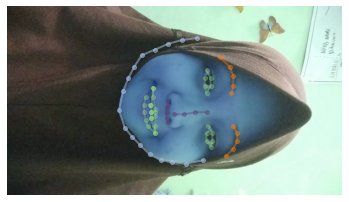

In [0]:
import collections


preds = koordinat[8]

plot_style = dict(marker='o',
                  markersize=4,
                  linestyle='-',
                  lw=2)

pred_type = collections.namedtuple('prediction_type', ['slice', 'color'])
pred_types = {'face': pred_type(slice(0, 17), (0.682, 0.780, 0.909, 0.5)),
              'eyebrow1': pred_type(slice(17, 22), (1.0, 0.498, 0.055, 0.4)),
              'eyebrow2': pred_type(slice(22, 27), (1.0, 0.498, 0.055, 0.4)),
              'nose': pred_type(slice(27, 31), (0.345, 0.239, 0.443, 0.4)),
              'nostril': pred_type(slice(31, 36), (0.345, 0.239, 0.443, 0.4)),
              'eye1': pred_type(slice(36, 42), (0.596, 0.875, 0.541, 0.3)),
              'eye2': pred_type(slice(42, 48), (0.596, 0.875, 0.541, 0.3)),
              'lips': pred_type(slice(48, 60), (0.596, 0.875, 0.541, 0.3)),
              'teeth': pred_type(slice(60, 68), (0.596, 0.875, 0.541, 0.4))
              }

fig, ax1 = plt.subplots(1, 1)
ax1.imshow(img[8])
# ax2.imshow(img[2])


for pred_type in pred_types.values():
  ax1.plot(preds[pred_type.slice, 0], preds[pred_type.slice, 1], color=pred_type.color, **plot_style)
ax1.axis('off')

# preds = koordinat[2]

# for pred_type in pred_types.values():
#   ax2.plot(preds[pred_type.slice, 0], preds[pred_type.slice, 1], color=pred_type.color, **plot_style)
# ax2.axis('off')

False
